# 1. Imports

In [1]:
#General
import pandas as pd
import numpy as np


import matplotlib.pyplot            as plt
import seaborn                      as sns
from sklearn.preprocessing          import StandardScaler
from sklearn                        import preprocessing, linear_model
from sklearn.metrics                import r2_score, mean_squared_error,confusion_matrix,explained_variance_score
from sklearn.model_selection        import train_test_split, cross_val_score, cross_val_predict,GridSearchCV, KFold

#Models
from sklearn.linear_model           import LinearRegression, Ridge
from sklearn.tree                   import DecisionTreeRegressor
from sklearn.svm                    import SVR
from sklearn.ensemble               import RandomForestRegressor
import statsmodels.api              as sm

In [2]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

# 2. Load Data

In [3]:
#Load the file generated from EDA.
file = 'Asteroid_EDA_Clean.csv'
df = pd.read_csv(file, sep=',', index_col=0)

In [4]:
#Verify that the data loaded correctly.
df.head().T

,0,1,2,3,4
semi-major_axis(au),2.76917,2.77247,2.66915,2.36142,2.57425
eccentricity,0.076009,0.230337,0.256942,0.0887215,0.191095
x-y_inclination(deg),10.5941,34.8362,12.9889,7.14177,5.36699
longitude_asc_node,80.3055,173.08,169.853,103.811,141.577
argument_perihelion,73.5977,310.049,248.139,150.729,358.688
perihelion_dist(au),2.55868,2.13386,1.98333,2.15191,2.08232
aphelion_dist(au),2.97965,3.41107,3.35497,2.57093,3.06617
data_arc(d),8822,72318,72684,24288,63507
n_obs_used,1002,8490,7104,9325,2916
diameter,939.4,545,246.596,525.4,106.699


# 3. Feature Engineering

In [5]:
#Check for categorical variables.
df.select_dtypes(include=['object']).head().T

,0,1,2,3,4
class,MBA,MBA,MBA,MBA,MBA


In [6]:
#Removed class since it was consistently shown to be a variable of almost no importance.
#Most likely because other features indicate class sufficiently.
#Create dummy variables for class.
#df = pd.get_dummies(df, columns=['class'])

In [7]:
#df.columns

# 4. Explore the Data

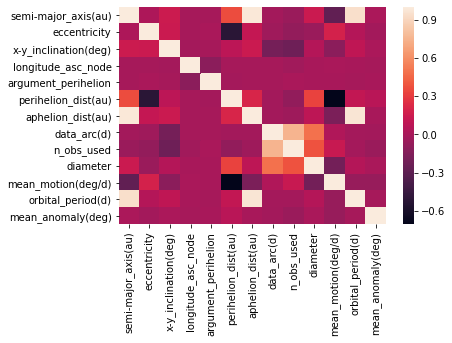

In [8]:
# Make a heatmap of the data 
sns.heatmap(df.corr());

# 5. Standarize Data and Split into Training and Test Sets

In [9]:
#Split data into features and target.
y = df['diameter']
X = df.drop(columns = ['diameter', 'class','n_obs_used'])

In [10]:
#Create training and test data.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [11]:
#Standarize the features

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

# 6. Initial Models

### Linear Regression (sklearn)

In [12]:
#Create the model.
rm = LinearRegression()

#Train the model.
rm.fit(X_train, y_train)

#Evaluate the model.
rm_score = rm.score(X_train, y_train)

print(rm_score)

0.42825983260698


In [13]:
#Use the model to make predictions.
rm_pred = rm.predict(X_test)

In [14]:
rm_mse = mean_squared_error(y_test, rm_pred)
rm_rmse = np.sqrt(rm_mse)

print(rm_mse)
print(rm_rmse)

69.25330223544557
8.321856898279709


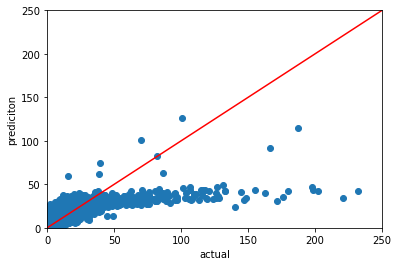

In [15]:
#Plot the predictions against the actual values.
plt.scatter(y_test, rm_pred)
plt.plot([0,250],[0,250],c = 'red')
plt.xlabel('actual')
plt.ylabel('prediciton')
plt.xlim(0, 250) 
plt.ylim(0, 250) 
plt.show()

### Linear Regression (OLS)

In [16]:
#Split data into features and target.
y2 = df['diameter']
X2 = df.drop(columns = ['diameter', 'class','n_obs_used'])

X2 = sm.add_constant(X2)

In [17]:
#Create training and test data.
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42)

In [18]:
#Standarize the features

scaler = preprocessing.StandardScaler().fit(X2_train)

X2_train_scaled = scaler.transform(X2_train)

X2_test_scaled = scaler.transform(X2_test)

In [19]:
# Create the model.
rm2 = sm.OLS(y2_train, X2_train)

# Fit the model. 
rm2_fit = rm2.fit()

# Evaluate the model.
rm2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               diameter   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     8247.
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:04:47   Log-Likelihood:            -3.7043e+05
No. Observations:              110108   AIC:                         7.409e+05
Df Residuals:                  110097   BIC:                         7.410e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -34.7340      0.297   -116.980      0.000     -35.316     -34.152
semi-major_axis(au)      3.2190      0.023    140.284      0.000       3.174       3.264
eccentricity            29.3101      0.424     69.201      0.000      28.480      30.140
x-y_inclination(deg)     0.1393      0.003     42.746      0.000       0.133       0.146
longitude_asc_node       0.0004      0.000      2.012      0.044    1.08e-05       0.001
argument_perihelion      0.0008      0.000      4.024      0.000       0.000       0.001
perihelion_dist(au)      8.8298      0.071    124.630      0.000       8.691       8.969
aphelion_dist(au)       -2.3919      0.044    -54.555      0.000      -2.478      -2.306
data_arc(d)              0.0008    3.5e-06    229.301      0.000       0.001       0.001
mean_motion(deg/d)      19.7278      0.542     36.407      0.000      18.666      20.790
orbital_period(d)        0.0002   1.26e-05     16.861      0.000       0.000       0.000
mean_anomaly(deg)       -0.0009      0.000     -4.484      0.000      -0.001      -0.001
==============================================================================
Omnibus:                   246552.217   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       4429906684.069
Skew:                          20.655   Prob(JB):                         0.00
Kurtosis:                     984.769   Cond. No.                     4.76e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.35e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [20]:
#Use the model to make predictions.
rm2_pred = rm2_fit.predict(X2_test)

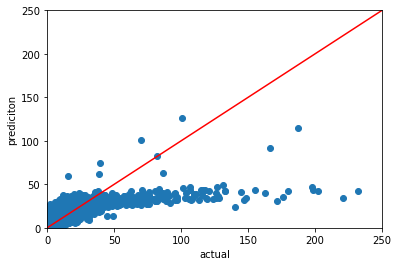

In [21]:
#Plot the predictions against the actual values.
plt.scatter(y2_test, rm2_pred)
plt.plot([0,250],[0,250],c = 'red')
plt.xlabel('actual')
plt.ylabel('prediciton')
plt.xlim(0, 250) 
plt.ylim(0, 250) 
plt.show()

### Lasso

In [22]:
param_grid = {'alpha': [0.01,0.05,0.1,1,10,100]}
lasso = linear_model.Lasso()
lasso_cv = GridSearchCV(lasso, param_grid, cv=10)
lasso_cv.fit(X,y)

print(lasso_cv.best_params_)

print(lasso_cv.best_score_)

{'alpha': 1}
-0.4806274932931801


In [23]:
lasso = linear_model.Lasso(alpha = 1)
lasso.fit(X_train, y_train)
lasso_score = lasso.score(X_train, y_train)

print(lasso_score)

0.3532690423207666


In [24]:
lasso_pred = lasso.predict(X_test)

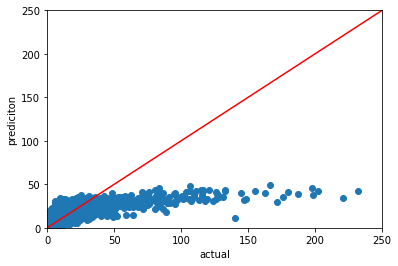

In [25]:
#Plot the predictions against the actual values.
plt.scatter(y_test, lasso_pred)
plt.plot([0,250],[0,250],c = 'red')
plt.xlabel('actual')
plt.ylabel('prediciton')
plt.xlim(0, 250) 
plt.ylim(0, 250) 
plt.show()

### Elastic Net

In [26]:
from sklearn.linear_model import ElasticNet

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

C:\Users\eboci_000\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2474671.927007743, tolerance: 735.4923135510961
  positive)
C:\Users\eboci_000\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2307601.1015460114, tolerance: 697.786314093051
  positive)
C:\Users\eboci_000\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2612618.4625274735, tolerance: 763.8519861078121
  positive)
C:\Users\eboci_000\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

Tuned ElasticNet l1 ratio: {'l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.2665786811755504
Tuned ElasticNet MSE: 71.94089116779301


### Decision Tree Regression

In [27]:
dtr = DecisionTreeRegressor(max_depth = 6)
dtr.fit(X_train, y_train)
dtr_score = dtr.score(X_train, y_train)
dtr_pred = dtr.predict(X_test)

print(dtr_score)

0.756074580521579


In [28]:
dtr_score_test = dtr.score(X_test, y_test)
print(dtr_score_test)

0.4278616103021468


In [29]:
dtr_mse = mean_squared_error(y_test, dtr_pred)
dtr_rmse = np.sqrt(dtr_mse)

print(dtr_mse)
print(dtr_rmse)

56.12073793020136
7.491377572262752


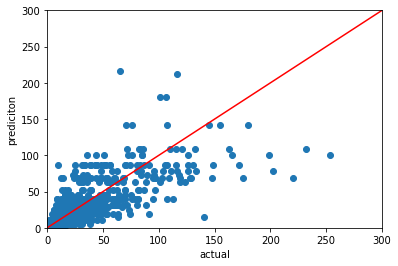

In [30]:
plt.scatter(y_test,dtr_pred)
plt.plot([0,300],[0,300],c = 'red')
plt.xlabel('actual')
plt.ylabel('prediciton')
plt.xlim(0, 300) 
plt.ylim(0, 300) 
plt.show()

### Random Forest Regressor

In [31]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_score = rf.score(X_train, y_train)
rf_pred = rf.predict(X_test)

print(rf_score)

0.9311373330426762


In [32]:
rf_score_test = rf.score(X_test, y_test)
print(rf_score_test)

0.4896906235136193


In [33]:
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)

print(rf_mse)
print(rf_rmse)

50.055964250608824
7.075023975267421


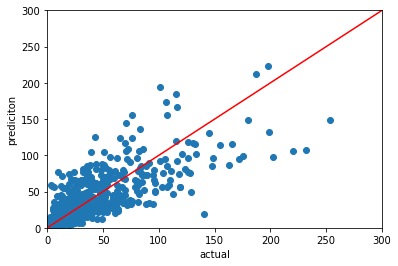

In [34]:
plt.scatter(y_test,rf_pred)
plt.plot([0,300],[0,300],c = 'red')
plt.xlabel('actual')
plt.ylabel('prediciton')
plt.xlim(0, 300) 
plt.ylim(0, 300) 
plt.show()

11


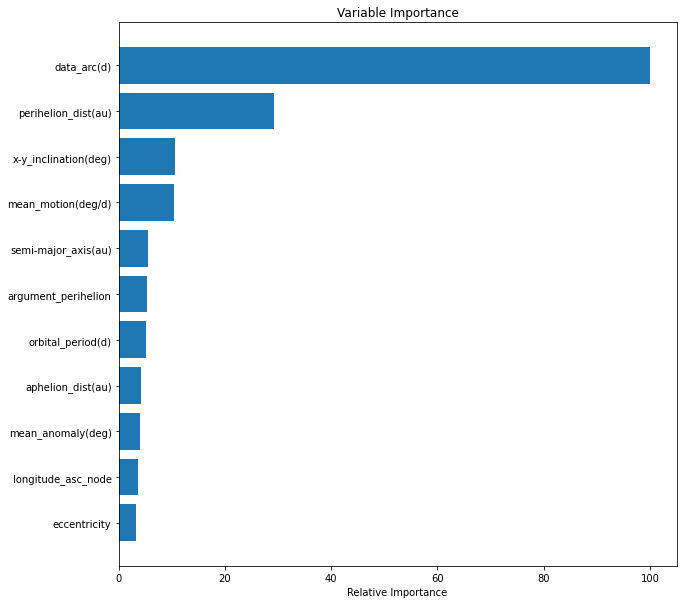

In [35]:
feature_importance = rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [36]:
#Split data into features and target.
y3 = df['diameter']
X3 = df[['data_arc(d)','perihelion_dist(au)', 'mean_motion(deg/d)','x-y_inclination(deg)']]

In [37]:
#Create training and test data.
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y3, test_size=0.2, random_state=42)

In [38]:
#Standarize the features

scaler = preprocessing.StandardScaler().fit(X3_train)

X3_train_scaled = scaler.transform(X3_train)

X3_test_scaled = scaler.transform(X3_test)

In [39]:
rf3 = RandomForestRegressor()
rf3.fit(X3_train, y3_train)
rf3_score = rf3.score(X3_train, y3_train)
rf3_pred = rf3.predict(X3_test)

print(rf3_score)

0.9471050379723578


In [40]:
rf3_score_test = rf3.score(X3_test, y3_test)
print(rf3_score_test)

0.47349723013573486


In [41]:
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)

print(rf_mse)
print(rf_rmse)

50.055964250608824
7.075023975267421
